#Lab 3
##Graham Roberts
###8 January 2016

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate as intgrt
import math
%matplotlib inline

In [58]:
class dataFrame326(object):
    
    #def __calcAverage(self, **kwargs): 
    #    if kwargs is not None:
    #        for key, value in kwargs.iteritems():
    #            if (key=='delta' and value==True):
    #                return np.sum(self.__uncertainties)/len(self.__uncertainties)
    #            else:
    #                return np.sum(self.__measurements)/len(self.__measurements)
    #    else:
    #    return np.sum(self.__measurements)/len(self.__measurements)
    
    def __calcAverage(self, **kwargs):
       if ('delta' in kwargs) and kwargs['delta']==True:
            return np.sum(self.__uncertainties)/len(self.__uncertainties)
       else:
            print np.sum(self.__measurements)/len(self.__measurements)
            return np.sum(self.__measurements)/len(self.__measurements)
   
        
    #def __calcSD(self, **kwargs):   
    #    meanSquared, denominator = 1,1
    #    if kwargs is not None:
    #        for key,value in kwargs.iteritems():
    #            if (key=='delta' and value==True):
    #                meanSquared=np.sum([(i-self.__delta_av)**2 for i in self.__uncertainties])
    #                denominator=len(self.__uncertainties)-1
    #            else:
    #                meanSquared=np.sum([(i-self.__av)**2 for i in self.__measurements])
    #                denominator=len(self.__measurements)-1
    #    else:
    #        meanSquared=np.sum([(i-self.__av)**2 for i in self.__measurements])
    #        denominator=len(self.__measurements)-1
    #    return np.sqrt(meanSquared/denominator)
    
    def __calcSD(self, **kwargs):
        meanSquared, denominator = 1,1
        if ('delta' in kwargs) and kwargs['delta']==True:
             meanSquared=np.sum([(i-self.__delta_av)**2 for i in self.__uncertainties])
             denominator=len(self.__uncertainties)-1
        else:
            meanSquared=np.sum([(i-self.__av)**2 for i in self.__measurements])
            denominator=len(self.__measurements)-1
        return np.sqrt(meanSquared/denominator)
            
        
        return np.sqrt(np.sum([(i-calcAverage(arrayLike))**2 for i in arrayLike])/(len(arrayLike)-1))
    
    def __calcWAV(self):
       weights=np.zeros(len(self.__measurements))
       for i in range (0,len(self.__measurements)):
          if self.__uncertainties[i]!=0:
             weights[i]=1./(self.__uncertainties[i])**2
          else:
             weights[i]=1./((self.__sd)**2)
       return float(np.sum(self.__measurements*weights))/np.sum(weights), 1./np.sqrt(np.sum(weights))
   

    def __init__(self, measurements, uncertainties):
        self.__measurements=measurements
        self.__uncertainties=uncertainties
        self.__av=self.__calcAverage()
        self.__delta_av=self.__calcAverage(delta=True)
        self.__sd=self.__calcSD()
        self.__delta_sd=self.__calcSD(delta=True)
        self.__wav=self.__calcWAV()
        
    #def mean(self,**kwargs):
    #    print self.__av
    #    if kwargs is not None:
    #        for key, values in kwargs.iteritems():
    #            if (key==delta and value==True):
    #                return self.__delta_av
    #            else:
    #                return self.__av
    #    else:
    #        return self.__av
        
        
    def mean(self, **kwargs):
        if('delta' in kwargs) and kwargs['delta']==True:
            return self.__delta_av
        else:
                    return self.__av
        
    #def sd(self,**kwargs):
        if kwargs is not None:
            for key, value in kwargs.iteritems():
                if (key==delta and value==True):
                    return self._delta_sd
                else:
                    return self.__sd
        else:
                    return self.__sd
            
    def sd(self, **kwargs):
       if ('delta' in kwargs) and kwargs['delta'] ==True:
          return self._delta_sd
       else:
                    return self.__sd
    def wav(self):
        return self.__wav
    
    

   

In [59]:
diameter, diameterDelta = np.loadtxt("diameter.txt",skiprows=1,unpack=True)
mass, massDelta = np.loadtxt("mass.txt",skiprows=1,unpack=True)
#print(diameter)
d = dataFrame326(diameter, diameterDelta)
print d.mean()
print d.__calcAverage()
print d.sd()
print d.wav()

53.5259701493
(53.641897286959406, 0.00092817718694005293)
53.5259701493
None
(53.641897286959406, 0.00092817718694005293)


In [36]:
def calcAverage(arrayLike): return np.sum(arrayLike)/len(arrayLike)

In [5]:
def calcSD(arrayLike):   return np.sqrt(np.sum([(i-calcAverage(arrayLike))**2 for i in arrayLike])/(len(arrayLike)-1))

In [6]:
def calcWAV(arrayLike, arrayLikeDelta):
    weights=np.zeros(len(arrayLike))
    print(len(arrayLike))
    print(len(weights))
    for i in range (0,len(arrayLike)):
        if arrayLikeDelta[i]!=0:
            weights[i]=calcSD(arrayLike)
        else:
            weights[i]=1./((arrayLike[i]-calcAverage(arrayLike))**2)
    return float(np.sum(arrayLike*weights))/np.sum(weights), 1./np.sqrt(np.sum(weights))

In [7]:
def schemCalcGaussian(arrayLike):   return (1/calcSD(arrayLike)*np.sqrt(2*np.pi))*np.e**(-((sequence(arrayLike)-calcAverage(arrayLike))**2)/(2*calcSD(arrayLike)**2))

In [8]:
def calcGaussian(arrayLike,sequence):
    mean=calcAverage(arrayLike)
    SD=calcSD(arrayLike)
    normalizationFactor=1./(np.sqrt(2.*np.pi)*SD)
    exponent=(-((sequence-mean)**2)/(2.*(SD**2)))
    print intgrt.romb(np.e**exponent*normalizationFactor)
    print normalizationFactor
    return normalizationFactor*np.e**exponent

In [26]:
def sequence(arrayLike):
    return np.linspace(int(min(arrayLike))-1,int(max(arrayLike))+1,2**10+1)

In [28]:
def calcBreaks(arrayLike):
    sd=calcsd(arrayLike)
    mean=calcAverage(arrayLike)
    [(0.5+1)*i for ((0.5+1)*i) in range(mean,max(arrayLike)+2)]

SyntaxError: can't assign to operator (<ipython-input-28-7dd6ecd5c6e4>, line 4)

169.961316902
0.714783595922


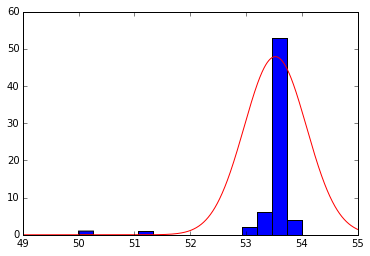

In [11]:
seq=sequence(diameter)
plt.hist(diameter,15)
plt.plot(seq,len(diameter)*calcGaussian(diameter,seq),'r-')

In [12]:
print len((1/calcSD(diameter)*np.sqrt(2*np.pi))*np.e**(-((np.linspace(int(min(diameter))-1,int(max(diameter))+1,1000)-calcAverage(diameter))**2)/(2*calcSD(diameter)**2)))

1000


In [13]:
intgrt.simps(calcGaussian(diameter,sequence(diameter)))
intgrt.cumtrapz(calcGaussian(diameter,sequence(diameter)))
intgrt.romb(calcGaussian(diameter,sequence(diameter)),sequence(diameter)[1]-sequence(diameter)[0])

169.961316902
0.714783595922
169.961316902
0.714783595922
169.961316902
0.714783595922


0.99586709122397532

In [14]:
calcWAV(diameter,diameterDelta)

67
67


(53.602510993509625, 0.093764305649211038)

In [15]:
def comp(x,upper, lower):
   return(x<=upper and x>=lower)

In [16]:
print calcSD(diameter)
print np.std(diameter)

0.558130156704
0.5539493476


(array([  1.,   0.,   1.,   0.,   0.,   0.,   0.,   2.,   7.,  56.]),
 array([ 50. ,  50.4,  50.8,  51.2,  51.6,  52. ,  52.4,  52.8,  53.2,
         53.6,  54. ]),
 <a list of 10 Patch objects>)

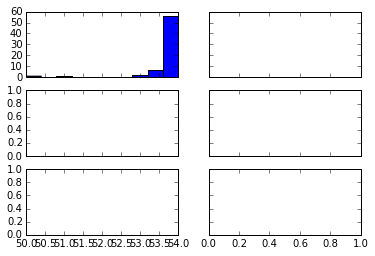

In [25]:
f, ax=plt.subplots(3,2,sharex='col',sharey='row')
ax[0,0].hist(diameter)